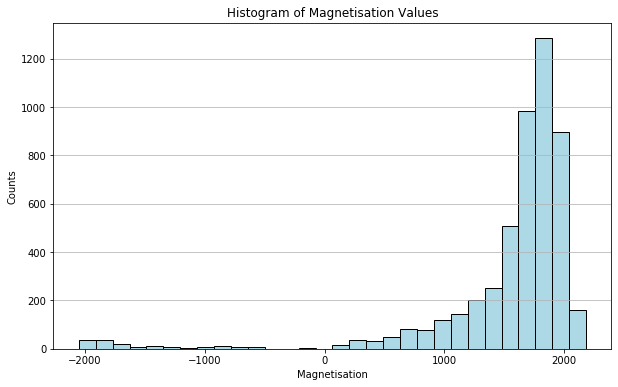

In [183]:
import matplotlib.pyplot as plt
import numpy as np
import math

# data = []
# with open("dat.txt", "r") as file:
#     for line in file:
#         data.append(float(line.strip()))

input = np.genfromtxt('dat.txt', delimiter = ',', skip_header = 1, usecols = 0)


plt.figure(figsize=(10, 6))
plt.hist(input, bins=30, color='lightblue', edgecolor='black')
plt.title("Histogram of Magnetisation Values")
plt.xlabel("Magnetisation")
plt.ylabel("Counts")
plt.grid(axis='y', alpha=0.9)
plt.savefig('mag.png', dpi = 200)
plt.show()


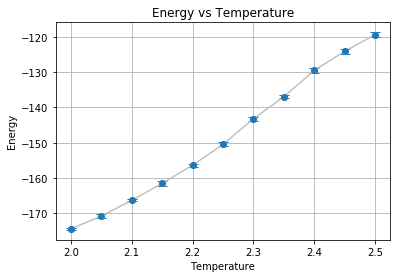

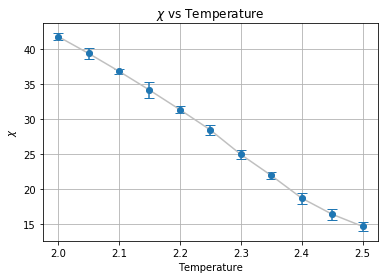

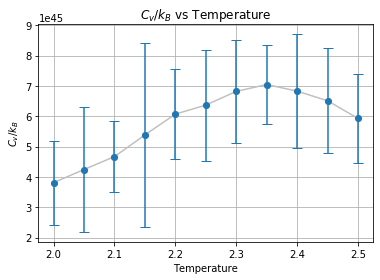

In [195]:
incoming = np.genfromtxt('dat2.txt', delimiter = ',', skip_header = 1, dtype=None)

L = 10

temps = [incoming[i][0] for i in range(len(incoming))]
energy = [incoming[i][1] for i in range(len(incoming))]
mag_sq = [incoming[i][2] for i in range(len(incoming))]
energy_sq = [incoming[i][3] for i in range(len(incoming))]
energy_err = [incoming[i][4] for i in range(len(incoming))]
energy_sq_err = [incoming[i][5] for i in range(len(incoming))]
mag_sq_err = [incoming[i][6] for i in range(len(incoming))]
mag_frth = [incoming[i][7] for i in range(len(incoming))]

# ENERGY PLOTTING
plt.errorbar(temps, energy, yerr=energy_err, fmt='o', capsize=5)
plt.plot(temps, energy, color='silver', marker = 'o')
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.title('Energy vs Temperature')
#plt.legend()
plt.grid(True)
plt.savefig('energy.png', dpi = 200)
plt.show()


# CHI PLOTTING
chi = [M/(T*L**2) for M,T in zip(mag_sq, temps)]
chi_err = [M_err/(T*L**2) for M_err,T in zip(mag_sq_err, temps)]

plt.errorbar(temps, chi, yerr=chi_err, fmt='o', capsize=5)
plt.plot(temps, chi, color='silver', marker = 'o')
plt.xlabel('Temperature')
plt.ylabel('$\chi$')
plt.title('$\chi$ vs Temperature')
#plt.legend()
plt.grid(True)
plt.savefig('chi.png', dpi = 200)
plt.show()


# CK SH*T PLOTTING
boltz = 1.380649e-23

ck = [ (energy_sq - (energy)**2) / (L**2*boltz**2*temps**2)
      for energy_sq, energy, temps in zip(energy_sq,energy,temps) ]
ck_err =[ (np.sqrt(energy_sq_err**2 + (2 * energy * energy_err)**2))/(L**2 * boltz**2 * T**2) 
      for energy_sq_err, energy_err, energy, T in zip(energy_sq_err, energy_err, energy, temps) ]

plt.errorbar(temps, ck, yerr=ck_err, fmt='o', capsize=5)
plt.plot(temps, ck, color='silver', marker = 'o')
plt.xlabel('Temperature')
plt.ylabel('$C_v/k_B$')
plt.title('$C_v/k_B$ vs Temperature')
#plt.legend()
plt.grid(True)
plt.savefig('ck.png', dpi = 200)
plt.show()



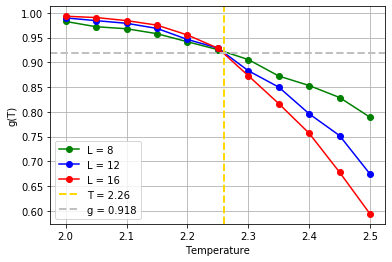

In [234]:
incoming8 = np.genfromtxt('dat_8.txt', delimiter = ',', skip_header = 1, dtype=None)
incoming12 = np.genfromtxt('dat_12.txt', delimiter = ',', skip_header = 1, dtype=None)
incoming16 = np.genfromtxt('dat_16.txt', delimiter = ',', skip_header = 1, dtype=None)

mag_sq_8 = [incoming8[i][2] for i in range(len(incoming))]
mag_frth_8 = [incoming8[i][7] for i in range(len(incoming))]

mag_sq_12 = [incoming12[i][2] for i in range(len(incoming))]
mag_frth_12 = [incoming12[i][7] for i in range(len(incoming))]

mag_sq_16 = [incoming16[i][2] for i in range(len(incoming))]
mag_frth_16 = [incoming16[i][7] for i in range(len(incoming))]

g8 = [ 0.5 * (3 - (mag_frth/mag_sq**2)) for mag_frth, mag_sq in zip(mag_frth_8, mag_sq_8)]
g12 = [ 0.5 * (3 - (mag_frth/mag_sq**2)) for mag_frth, mag_sq in zip(mag_frth_12, mag_sq_12)]
g16 = [ 0.5 * (3 - (mag_frth/mag_sq**2)) for mag_frth, mag_sq in zip(mag_frth_16, mag_sq_16)]

plt.xlabel('Temperature')
plt.ylabel('g(T)')
plt.plot(temps, g8, color='green', marker = 'o', label = "L = 8")
plt.plot(temps, g12, color='blue', marker = 'o', label = "L = 12")
plt.plot(temps, g16, color='red', marker = 'o', label = "L = 16")
plt.axvline(x=2.26, color='gold', linestyle='--', linewidth=2, label='T = 2.26')
plt.axhline(y=0.918, color='silver', linestyle='--', linewidth=2, label='g = 0.918')
plt.legend()
plt.grid(True)
plt.savefig("gt.png", dpi = 200)
plt.show()